# Introducción rápida (o repaso) probabilidad

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import preliz as pz
from ipywidgets import interact
from scipy import special, stats
import ipywidgets as ipyw

In [2]:
az.style.use('arviz-white')  # aplica estilo a los gráficos
np.random.seed(42)  # semilla para fijar números aleatorios

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

El objetivo de este primer capítulo es introducir algunos términos y conceptos generales de estadística, los cuales nos serán de utilidad para discutir todos los tópicos centrales de este curso. La introducción es bastante general, por lo que a lo largo del texto se proveen de enlaces para seguir leyendo y profundizando en el tema.

## Azahar, azar y dados 

Las palabras azahar y azar no son similares por casualidad ambas provienen de la misma palabra árabe que significa flor. Desde la antigüedad, y hasta el día de hoy, ciertos juegos, como el juego de la [taba](https://es.wikipedia.org/wiki/Juego_de_las_tabas), utilizan un hueso con dos lados planos a modo de dado. De hecho se podría decir que la taba es el antecesor del dado moderno. Para facilitar distinguir un lado del otro, es común que uno de los lados esté marcado de alguna forma. Resulta ser que los árabes usaban una flor. Con el tiempo el castellano adoptó azahar, para designar solo ciertas flores como las del [naranjo](https://www.youtube.com/watch?v=JNKnWEHdcH0) y azar como sinónimo de aleatorio. 

Empecemos, entonces imaginando que tenemos un dado de 6 caras, cada vez que arrojamos el dado solo es posible obtener un número entero del 1-6 es decir `[1, 2, 3, 4, 5, 6]`. Al arrojar el dado podemos obtener cualquier de estos números sin preferencia de uno sobre otro. Usando Python podemos programar un dado de 6 caras de la siguiente forma:

In [4]:
(np.linspace(0, 1, 6) < np.random.rand()).sum() + 1

3

In [5]:
def dado():
    resultados_posibles = [1, 2, 3, 4, 5, 6]
    return np.random.choice(resultados_posibles)

dado()

5

Supongamos que sospechamos que el dado está trucado. ¿Qué podríamos hacer para evaluar esta posibilidad? 

* Una posibilidad es consultar a los astros o los ángeles.
* Otra sería pensar mucho sobre el problema para luego quizá declararse agnóstico sobre la _truquez_ no solo del dado en cuestión si no de los dados en general y aún más sobre la posibilidad misma de acceder al conocimiento.
* Una tercera alternativa es recolectar datos y analizarlos, esta última es la opción preferida por quienes practican disciplinas científicas, en particualr la estadística.

Usando Python podemos _simular_ la recolección de datos de la siguiente forma.

In [6]:
def experimento(N=10000):
    muestra = [dado() for i in range(N)]

    for i in range(1, 7):
        print(f'{i}: {muestra.count(i)/N:.2g}')

experimento()

1: 0.17
2: 0.17
3: 0.16
4: 0.17
5: 0.17
6: 0.17


Los números en la primer columna son los posibles resultados. Los de la segunda columna corresponden con la frecuencia con la que aparece cada número. La frecuencia es la cantidad de veces que aparece cada uno de los posibles resultados dividido por `N`. Siendo `N` el total de veces que arrojamos el dado.

Hay al menos dos aspectos que vale resaltar en este ejemplo:

* Cada vez que se ejecuta la celda anterior, es decir cada vez que realizamos el experimento, se obtiene un resultado distinto. Esta es precisamente la razón de usar dados en juegos _de azar_, cada vez que los arrojamos obtenemos un número que no podemos predecir con absoluta certeza.

* Si arrojamos muchas veces un mismo dado la capacidad de predecir cada una de las tiradas no mejora. En ese sentido recolectar datos no nos ayuda. Pero recolectar datos si mejora la capacidad de predecir el _listado de las frecuencias_, de hecho la capacidad mejora de forma consistente al aumentar `N`. Para un valor de `N=10000` verás que las frecuencias obtenidas son aproximadamente $0.17$ y resulta ser que $0.17 \approx \frac{1}{6}$ que es lo que esperado si cada número en el dado tuviera la misma posibilidad de aparecer.

Estas dos observaciones no están restringidas a los dados y los juegos de azar. Si nos pesáramos todos los días obtendríamos distintos valores ya que el peso tiene relación con la cantidad de comida que ingerimos, el agua que tomamos, cuantos orinamos y defecamos, la precisión de la balanza, la ropa que usamos. Por todo ello una sola medida podría no ser representativa de nuestro peso. Es cierto que todas estas variaciones podrían ser demasiado pequeñas para nuestro propósito y podriamos considerarlas irrelevantes, pero eso es adelantarse a nuestra discusión. El punto importante en este momento es que los datos van acompañados de incertidumbre, gran parte de la estadística tiene que ver con métodos y prácticas para lidear con esa incertidumbre.

## Probabilidades


Es posible utilizar probabilidades para asignar números precisos a la incertidumbre de lo que observamos, medimos, modelamos, etc. Por ello Joseph K. Blitzstein y Jessica Hwang dicen _La matemática es la lógica de la certeza mientras que la probabilidad es la lógica de la incerteza_.

Entender como pensar en presencia de incerteza es central en Estadística y Ciencia de Datos y prácticamente en cualquier disciplina científica. Esta incerteza proviene de diversas fuentes, incluyendo datos incompletos, errores de medición, límites de los diseños experimentales, dificultad de observar ciertos eventos, aproximaciones, etc.

A continuación veremos una breve introducción a conceptos centrales en probabilidad a partir de lo cuales podremos comprender mejor los fundamentos del modelado Bayesiano. Para quienes tengan interés en profundizar en el tema recomiendo leer el libro [Introduction to Probability](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578) de Joseph K. Blitzstein y Jessica Hwang.

El marco matemático para trabajar con las probabilidades se construye alrededor de los conjuntos matemáticos. 

El espacio muestral $\mathcal{X}$ es el conjunto de todos los posibles resultados de un experimento. Un evento $A$ es un subconjunto de $\mathcal{X}$. Decimos que $A$ ha ocurrido si al realizar un _experimento_ obtenemos como resultado $A$. Si tuviéramos un típico dado de 6 caras tendríamos que:

$$\mathcal{X} = \{1, 2, 3, 4, 5, 6\} \tag {0.0}$$

Podemos definir al evento $A$ como:

$$A = \{2\} \tag {0.1}$$

Si queremos indicar la probabilidad del evento $A$ escribimos $P(A=2)$ o de forma abreviada $P(A)$. 

$P(A)$ puede tomar cualquier valor en el intervalo comprendido entre 0 y 1 (incluidos ambos extremos), en [notación de intervalos](https://es.wikipedia.org/wiki/Intervalo_(matem%C3%A1tica)#Notaci%C3%B3n) esto se escribe como [0, 1]. Es importante notar que no es necesariamente cierto que $P(A) = \frac{1}{6}$.

Al definir el evento $A$ podemos usar más de un elemento de $\mathcal{X}$. Por ejemplo, números impares $A = \{1, 3, 5\}$, o números mayores o iguales a 4 $A = \{4,5,6\}$, o $A = \{1,2,4,6\}$. Para cualquier problema concreto la definición de un evento como $A$ dependerá directamente del problema.

Resumiendo, los eventos son subconjuntos de un espacio muestral definido adecuadamente y las probabilidades son números entre 0 y 1 asociados a la posibilidad que esos eventos ocurran. Si el evento es imposible entonces la probabilidad de ese evento será exactamente 0, si en cambio el evento sucede siempre entonces la probabilidad de ese evento será de 1. Todos los valores intermedios reflejan grados de incerteza. Desde este punto de vista es _natural_ preguntarse cual es la probabilidad que la masa de Saturno sea $x$ kg, o hablar sobre la probabilidad de lluvia durante el 25 de Mayo de 1810, o la probabilidad de que mañana amanezca.

Esta interpretación del concepto de probabilidad como medida de incertidumbre se suele llamar interpretación Bayesiana o subjetiva. Existen otras interpretaciones, por ej según la interpretación fecuentista una probabilidad es la proporción de veces que un evento sucedería si pudieramos repetir infinitas veces una observación bajo las mismas condiciones. Es importante destacar que estas interpretaciones son andamiajes conceptuales, interpretaciones filosóficas. El aparato matemático que describe las probabilidades es uno solo y no distingue entre estas u otras interpretaciones.

## Probabilidad condicional

Una probabilidad condicional es simplemente la probabilidad de un evento dado que conocemos que otro evento ha sucedido. Al preguntar cual es la probabilidad que llueva dado que está nublado estamos planteando una probabilidad condicional.

Dado dos eventos $A$ y $B$ siendo $P(B) > 0$, la probabilidad de $A$ dado $B$ es definida como:

$$
P(A \mid B) \triangleq \frac{P(A, B)}{P(B)} \tag{0.2}
$$


$P(A, B)$ es la _probabilidad conjunta_, es decir la probabiliad que suceda el evento $A$ y que ocurra el evento $B$, también se suele escribir como $P(A \cap B)$, el símbolo $\cap$ indica intersección de conjuntos.

$P(A \mid B)$ es lo que se conoce como probabilidad condicional, y es la probabilidad de que ocurra el evento A *condicionada* por el conocimiento que B ha ocurrido. Por ejemplo la probabilidad que una vereda esté mojada puede set diferente de la probabilidad que esa vereda esté mojada dado que está lloviendo. 

Una probabilidad condicional se puede visualizar como la reducción del espacio muestral. Para ver esto de forma más clara vamos a usar una figura adaptada del libro [Introduction to Probability](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578) de Joseph K. Blitzstein y Jessica Hwang. En ella se puede ver como pasamos de tener los eventos $A$ y $B$ en el espacio muestral $\mathcal{X}$, en el primer cuadro, a tener $P(A \mid B)$ en el último cuadro donde el espacio muestral se redujo de $\mathcal{X}$ a $B$. 

<img src='img/cond.png' width=500 >

El concepto de probabilidad condicional está en el corazón de la estadística y es central para pensar en como debemos actualizar el conocimiento que tenemos de un evento a la luz de nuevos datos.  Veremos más sobre esto en los proximos capítulos. Por ahora dejamos este tema con la siguiente aclaración. Desde el punto de vista práctico, todas las probabilidades son condicionales (respecto de algún supuesto o modelo) aún cuando no lo expresemos explícitamente, no existen probabilidades sin contexto.

## Distribuciones de probabilidad

A nosotros en general no nos interesará calcular la probabilidad de eventos concretos sino que nos interesará calcular distribuciones de probabilidad. Es decir, en vez de calcular la probabilidad de obtener el número 5 al arrojar un dado, nos interesará averiguar el _listado de las frecuencias_ de todas las posibilidades del dado (1 al 6). Una vez obtenido este listado podremos hacer preguntas como ¿Cuál es la probabilidad de obtener el número 5?, ¿Cuánto más probable es obtener número pares que impares? u otras preguntas relacionadas. El nombre formal de este _listado_ es **distribución de probabilidad**.

En el ejemplo del dado obtuvimos una distribución de probabilidad empírica, es decir una distribución calculada a partir de datos. Pero también existen distribuciones teóricas, las cuales son centrales en estadística entre otras razones por que permiten construir modelos probabilístas.

Las distribuciones de probabilidad teóricas tienen formulas matemáticas precisas, de forma similar a como las circunferencias tienen una definición matemática precisa.

> Una circunferencia es el lugar geométrico de los puntos de un plano que equidistan a otro punto llamado centro.

Dado el parámetro `radio` una circunferencia queda perfectamente definida. Si necesitáramos ubicar la circunferencia respecto de otros objetos en el plano, necesitaríamos además las coordenadas del centro, pero omitamos ese _detalle_ por el momento.

Veamos el siguiente ejemplo:

In [7]:
def dibuja_circ(radio):
    _, ax = plt.subplots(figsize=(6, 6))
    x = np.linspace(0, 2*np.pi, 100)
    ax.plot(radio*np.cos(x), radio*np.sin(x))
    ax.set_xlim(-11, 11)
    ax.set_ylim(-11, 11)
    ax.set_xticks([])
    ax.set_yticks([])


interact(dibuja_circ,
         radio=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=2.));

interactive(children=(FloatSlider(value=2.0, description='radio', max=10.0, min=0.5, step=0.5), Output()), _do…

Podríamos decir que no existe una sola circunferencia, sino una familia de circunferencias donde cada miembro se diferencia del resto solo por el valor del parámetro `radio`, ya que una vez definido este parámetro la circunferencia queda definida.

De forma similar las distribuciones de probabilidad vienen en familias cuyos miembros quedan definidos por uno o más parámetros. Es común que los nombres de los parámetros de las distribuciones de probabilidad sean letras del alfabeto griego, aunque esto no es siempre así.

En el siguiente ejemplo tenemos una distribución de probabilidad que podríamos usar para representar un dado y que es controlada por dos parámetros $\alpha$ y $\beta$:

In [8]:
def dist_dado(α, β):
    n = 5
    x = np.arange(0, 6)
    dist_pmf = special.binom(n, x) * (special.beta(x+α, n-x+β) / special.beta(α, β))
    plt.vlines(x, 0, dist_pmf, colors='C0', lw=4)
    plt.ylim(0, 1)
    plt.xticks(x, x+1)


interact(dist_dado,
         α=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1),
         β=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1));

interactive(children=(FloatSlider(value=1.0, description='α', max=10.0, min=0.5, step=0.5), FloatSlider(value=…

Esta distribución (o familia de distribuciones) se llama `beta-binomial`, si cambiamos los parámetros $\alpha$ y $\beta$ la "forma particular" de la distribución cambiará, podemos hacer que sea _plana_ o concentrada más hacia el medio o hacia uno u otro extremo, etc. Así como el radio de la circunferencia debe ser positivo, los parámetros $\alpha$ y $\beta$ también están restringidos a ser positivos.

### Variables aleatorias discretas y distribuciones de probabilidad

Una variable aleatoria es una función que asocia números reales $\mathbb{R}$ con un espacio muestral. Continuando con el ejemplo del dado si los eventos de interés fuesen los números del dado entonces el mapeo es simple, ya que asociamos ⚀ con el número 1, ⚁ con el 2, etc. Si tuviéramos dos dados podríamos definir una variable aleatoria $S$ como la suma de ambos dados. En este caso la variable aleatoria tomaría los valores $\{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12\}$ y si los dados no están trucados la distribución de probabilidad de la variable sería

<a href="https://en.wikipedia.org/wiki/File:Dice_Distribution_(bar).svg"><img src='img/dist_dos_dados.png' width=500 ></a>


Otra variable aleatoria podría ser $C$ cuyo espacio muestral es $\{rojo, verde, azul\}$. Si los eventos de interés fuesen `rojo, verde, azul,` entonces podríamos _codificarlos_ de la siguiente forma:

`C(rojo) = 0, C(verde)=1, C(azul)=2`

Esta _codificación_ es útil ya que en general es más fácil operar con números que con _cadenas (strings)_, ya sea que las operaciones las hagamos manualmente o con una computadora.

Una variable es aleatoria en el sentido de que en cada _experimento_ es posible obtener un evento distinto sin que la sucesión de eventos siga un patrón determinista. Por ejemplo si _preguntamos_ cual es el valor de $C$ tres veces seguida podríamos obtener, `rojo, rojo, azul` o quizá `azul, verde, azul`, etc. 


Cuando se se habla de _variables aleatorias_, es común que surgan algunos malos entendidos:

* La variable NO puede tomar cualquier valor imaginable, en el ejemplo de los colores solo son posibles 3 valores. En el ejemplo del dado solo 6 valores son posibles.
* _Aleatorio_ NO implica que todos los eventos tengan igual probabilidad. 

bien podría darse el siguiente ejemplo:

$$P(C=rojo) = \frac{1}{2}, P(C=verde) = \frac{1}{4}, P(C=azul) = \frac{1}{4}$$

La equiprobabilidad de los eventos es solo un caso especial.

-----

Una variable aleatoria discreta es una variable que puede tomar valores discretos, los cuales forman un conjunto finito (o infinito [numerable](https://es.wikipedia.org/wiki/Conjunto_numerable)). En nuestro ejemplo $C$ es discreta ya que solo puede tomar 3 valores, sin posibilidad de valores intermedios entre ellos, no es posible obtener el valor _verde-rojizo_! $S$ también es discreta y como ya dijimos solo es posible obtener los enteros en el intervalo [2-12].

Si en vez de "rótulos" hubiéramos usado el espectro _continuo_ de longitudes onda _visibles_ otro sería el caso, ya que podríamos haber definido a $C=\{400 \text{ nm} ... 750\text{ nm}\}$  y en este caso no hay dudas que sería posible obtener un valor _a mitad de camino_ entre _rojo_ ($\approx 700 \text{ nm}$) y _verde_ ($\approx 530 \text{ nm}$), de hecho podemos encontrar infinitos valores entre ellos. Este sería el ejemplo de una variable aleatoria continua.

Una variable aleatoria tiene una _lista_ asociada con la probabilidad de cada evento. El nombre formal de esta _lista_ es disribución de probabilidad, en el caso particular de variables aleatorias discretas se le suele llamar también función de masa de probabilidad (o **pmf** por su sigla en inglés). Es importante destacar que la $pmf$ es una función que devuelve probabilidades, por lo tanto siempre obtendremos valores comprendidos entre [0, 1] y cuya suma total (sobre todos los eventos) dará 1.

En principio nada impide que uno defina su propia distribución de probabilidad. Pero a lo largo de los últimos 3 siglos se han identificado y estudiado muchas distribuciones de probabilidad que dado su utilidad se les ha asignado "nombre propio", por lo que conviene saber sobre su existencia. El siguiente listado no es exhaustivo ni tiene como propósito que _memoricen_ las distribuciones y sus propiedades, solo que ganen cierta familiaridad con las mismas. Si en el futuro necesitan utilizar alguna $pmf$ pueden volver a esta _notebook_ o pueden revisar Wikipedia donde encontrarán información muy completa.

En las siguientes gráficas las _alturas_ de los puntos azules indican la probabilidad de cada valor de $x$. Se indican, además, la media ($\mu$) y desviación estándar ($\sigma$) de las distribuciones, es importante destacar que estos valores NO son calculados a partir de _datos_, de hecho no hay datos solo objetos matemáticos. Los valores de $\mu$ $\sigma$ son propiedades matemáticas de las distribuciones, de la misma forma que el área de un círculo es una propiedad que queda definida una vez que fijamos el parámetro radio.

#### Distribución uniforme discreta

Es una [distribución](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) que asigna igual probabilidad a un conjunto finitos de valores, su $pmf$ es:

$$p(k \mid a, b)={\frac {1}{b - a + 1}} = \frac{1}{n}\tag {0.3}$$

Para valores de $k$ en el intervalo [a, b], fuera de este intervalo $p(k) = 0$, donde $n=b-a+1$ es la cantidad total de valores que puede tomar $k$.

Podemos usar esta distribución para modelar, por ejemplo un dado no cargado.

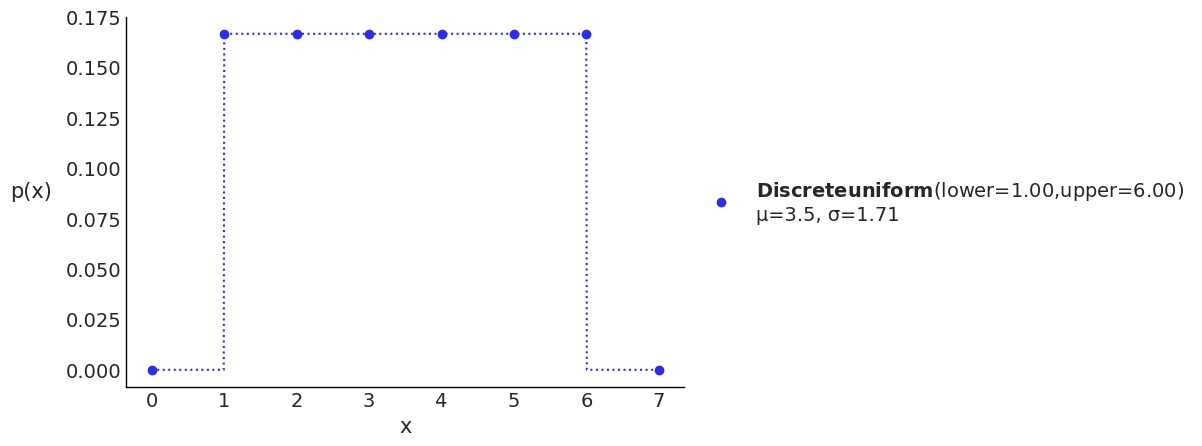

In [9]:
dist = pz.DiscreteUniform(lower=1, upper=6)
ax = dist.plot_pdf(moments="md", support=(0, 7))
ax.set_xlabel('x')
ax.set_ylabel('p(x)', rotation=0, labelpad=25);

En la figura anterior la altura de cada punto indica la probabilidad de cada evento, usamos puntos y lineas punteadas para remarcar que la distribución es discreta. En este ejemplo en concreto la distribución uniforme está definida en el intervalo [1, 6]. Por lo tanto todos los valores menores a 1 y mayores a 6 tienen probabilidad 0. Al ser una distribución uniforme todos los puntos tienen la misma altura y esa altura es $\frac{1}{6}$.

Los **parámetros** de la distribución discreta uniforme son dos:
* El límite inferior representado con la letra "a" en la expresión 0.6
* El límite superior representado con la letra "b" en la expresión 0.6

Si cambiamos los parámetros la "forma particular" de la distribución cambiará (prueben por ejemplo reemplazar `upper=6` en el bloque de código anterior por `upper=4`). Es por ello que se suele hablar de familia de distribuciones, cada miembro de esa familia es una distribución con una combinación particular y válida de parámetros. Por ejemplo _la familia de distribuciones discretas uniforme_ es aquella indicada en la expresión 0.6, siempre y cuando:
* $a < b$
* $a \in \mathbb {Z}$
* $b \in  \mathbb {Z}$

donde $\mathbb {Z}$ es el conjunto de los números enteros.


Es común vincular los parámetros con cantidades que tienen sentido _físico_ por ejemplo en un dado de 6 caras tiene sentido que $a=1$ y $b=6$. A veces desconocemos los valores de los parámetros y es nuestro trabajo utilizar datos y métodos estadísticos para encontrar esos valores.

#### Distribución binomial

Es la [distribución](https://en.wikipedia.org/wiki/Binomial_distribution) de probabilidad discreta que cuenta el número de éxitos en una secuencia de $n$ ensayos de Bernoulli (experimentos si/no) independientes entre sí, con una probabilidad fija $p$ de ocurrencia del éxito entre los ensayos.
Cuando $n=1$ esta distribución se reduce a la distribución de Bernoulli.

$$p(x \mid n,p) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x} \tag {0.4}$$

El término $p^x(1-p)^{n-x}$ indica la probabilidad de obtener $x$ éxitos en $n$ intentos. Este término solo tiene en cuenta el número total de éxitos obtenidos pero no la secuencia en la que aparecieron. El primer término conocido como **coeficiente binomial** calcula todas las posibles combinaciones de $n$ en $x$, es decir el número de subconjuntos de $x$ elementos escogidos de un conjunto con $n$ elementos.

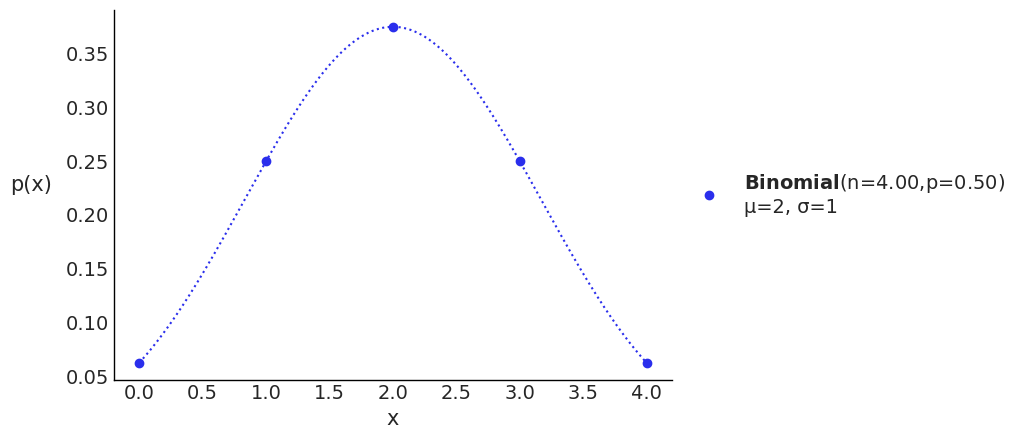

In [10]:
dist = pz.Binomial(n=4, p=0.5)
ax = dist.plot_pdf(moments="md")
ax.set_xlabel('x')
ax.set_ylabel('p(x)', rotation=0, labelpad=25);

#### Distribución de Poisson

Es una [distribución](https://en.wikipedia.org/wiki/Poisson_distribution) de probabilidad discreta que expresa la probabilidad que $x$ eventos sucedan en un intervalo fijo de tiempo (o espacio o volumen) cuando estos eventos suceden con una tasa promedio $\mu$ y de forma independiente entre si. Se la utiliza para modelar eventos con probabilidades pequeñas (sucesos _raros_) como accidentes de tráfico o decaimiento radiactivo.

$$
p(x \mid \mu) = \frac{\mu^{x} e^{-\mu}}{x!} \tag {0.5}$
$$

Tanto la media como la varianza de esta distribución están dadas por $\mu$. 

A medida que $\mu$ aumenta la distribución de Poisson se aproxima a una distribución Gaussiana (aunque sigue siendo discreta). La distribución de Poisson tiene estrecha relación con otra distribución de probabilidad, la binomial. Una distribución binomial puede ser aproximada con una distribución de Poisson, cuando $n >> p$, es decir, cuando la cantidad de "éxitos" ($p$) es baja respecto de la cantidad de "intentos" (p) entonces $\text{Poisson}(np) \approx \text{Binon}(n, p)$.  Por esta razón la distribución de Poisson también se conoce como "ley de los pequeños números" o "ley de los eventos raros". Ojo que esto no implica que $\mu$ deba ser pequeña, quien es pequeño/raro es $p$ respecto de $n$.

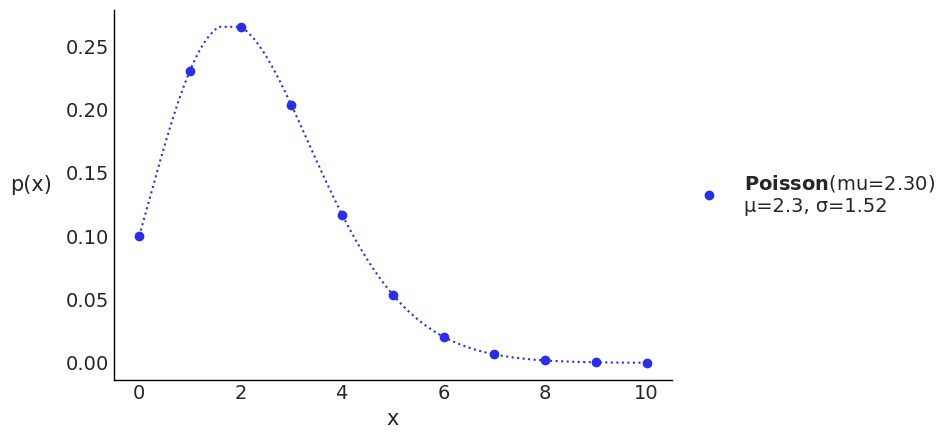

In [11]:
dist = pz.Poisson(mu=2.3)  # número de veces que se espera que ocurra un evento.
ax = dist.plot_pdf(moments="md")
ax.set_xlabel('x')
ax.set_ylabel('p(x)', rotation=0, labelpad=25);

### Variables aleatorias y distribuciones de probabilidad continuas

Hasta ahora hemos visto variables aleatorias discretas y distribuciones de masa de probabilidad. Existe otro tipo de variable aleatoria que son muy usadas y son las llamadas variables aleatorias continuas, ya que toman valores en $\mathbb{R}$.

La diferencia más importante entre variables aleatoria discretas y continuas es que para las continuas $P(X=x) = 0$, es decir, la probabilidad de cualquier valor es exactamente 0.

En las gráficas anteriores, para variables discretas, es la altura de los puntos lo que define la probabilidad de cada evento. Si sumamos todas las alturas siempre obtenemos 1. En una distribución continua no tenemos una cantidad finita de _puntos_  que sumar, en cambio tenemos una cantidad infinita de _puntos_ que definen una curva continua, la altura de esa curva es la _densidad de probabilidad_. Si queremos averiguar cuanto más probable es el valor $x_1$ respecto de $x_2$ basta calcular:

$$\frac{pdf(x_1)}{pdf(x_2)} \tag {0.6}$$

Donde $pdf$ es la función de densidad de probabilidad (por su sigla en inglés). Y es análoga a la $pmf$ que vimos para variables discretas. Una diferencia importante es que la $pdf(x)$ puede ser mayor a 1. Para obtener una probabilidad a partir de una pdf debemos integrar en un intervalo dado, ya que es el área bajo la curva y no la altura lo que nos da la probabilidad, es decir es esta integral la que debe dar entre 0 y 1.

$$P(a \lt X \lt b) =  \int_a^b pdf(x) dx$$

En muchos textos es común usar $p$ para referirse a la probabilidad de un evento en particular o a la $pmf$ o a la $pdf$, esperando que la diferencia se entienda por contexto.

A continuación veremos varias distribuciones continuas.

#### Distribución uniforme

Aún siendo simple, la distribución [uniforme](https://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29) es muy usada en estadística, por ejemplo para representar nuestra ignorancia sobre el valor que pueda tomar un parámetro.

$$
p(x \mid a,b)=\begin{cases} \frac{1}{b-a} & para\ a \le x \le b \\ 0 &  \text{para el resto} \end{cases} \tag {0.7}
$$

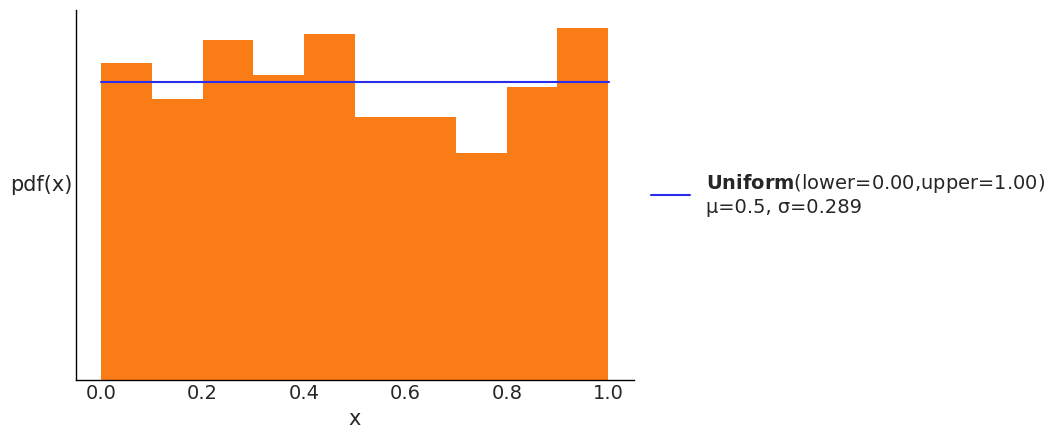

In [12]:
dist = pz.Uniform(0, 1)  
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);

En la figura anterior la curva azul representa la $pdf$. La $pdf$ es un objeto matemático que da la descripción exacta de la distribución, no es algo que exista en la _realidad_ si no una construcción matemática que es útil para aproximar o modelar algún aspecto de la _realidad_. La $pdf$ es como las esferas, las esferas no existen pero pueden ser útiles para describir objetos tales como pelotas, planetas, átomos, aún cuando ni las pelotas, planetas o átomos sean esferas.

El histograma en naranja representa una muestra tomadas a partir de la $pdf$ representada en azul. A diferencia de la curva azul, que es un objeto (matemático) concreto. Una muestra es aleatoria. Cada vez que ejecutemos la celda anterior la curva azul será la misma pero el histograma cambiará.

Una aclaración antes de continuar. Los histogramas no son lo mismo que los gráficos de barras. Los histogramas son una forma de representación visual de datos que usa barras a fin de aproximar una distribución continua. Si bien la cantidad de barras es discreta, la distribución que intenta aproximar es continua, es por ello que las barras se dibujan de forma contigua, mientras que en los gráficos de barras (que representan distribuciones discretas) las barras se dibujan espaciadas.

Luego de estas aclaraciones continuemos con otras distribuciones de probabilidad continuas.

#### Distribución Gaussiana (o normal)

Es quizá la [distribución](https://en.wikipedia.org/wiki/Normal_distribution) más conocida. Por un lado por que muchos fenómenos pueden ser descriptos (aproximadamente) usando esta distribución. Por otro lado por que posee ciertas propiedades matemáticas que facilitan trabajar con ella de forma analítica. Es por ello que muchos de los resultados de la estadística se basan en asumir una distribución Gaussiana.

La distribución Gaussiana queda definida por dos parámetros, la media $\mu$ y la desviación estándar $\sigma$. Una distribución Gaussiana con $\mu = 0$ y $\sigma = 1$ es conocida como la _distribución Gaussiana estándar_.

$$
p(x \mid \mu,\sigma) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}} \tag {0.8}
$$

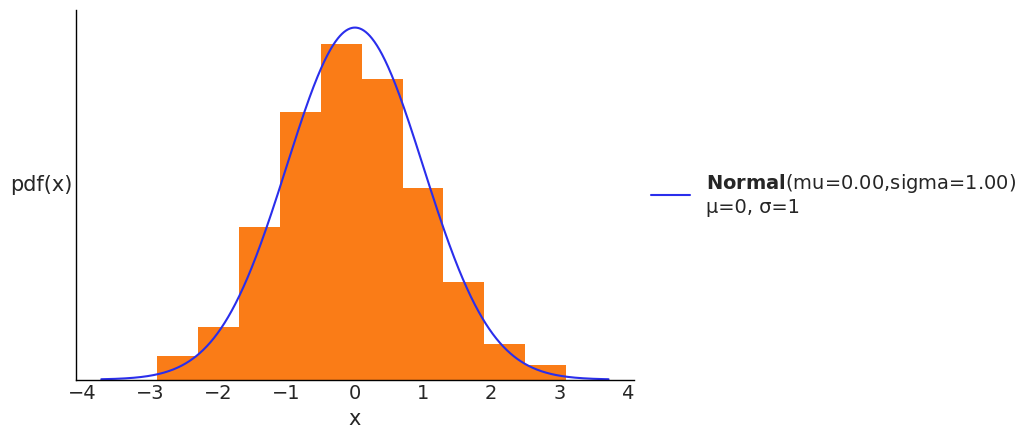

In [13]:
dist = pz.Normal(mu=0, sigma=1)  
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);

#### Distribución t de Student

Históricamente esta [distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) surgió para estimar la media de una población normalmente distribuida cuando el tamaño de la muestra es pequeño. En estadística Bayesiana su uso más frecuente es el de generar modelos robustos a datos aberrantes.


$$p(x \mid \nu,\mu,\sigma) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu}\sigma} \left(1+\frac{1}{\nu}\left(\frac{x-\mu}{\sigma}\right)^2\right)^{-\frac{\nu+1}{2}} \tag {0.9}
$$

donde $\Gamma$ es la función [gamma](https://en.wikipedia.org/wiki/Gamma_function) y donde $\nu$ es un parámetro llamado _grados de libertad_ en la mayoría de los textos aunque también se le dice _grado de normalidad_, ya que a medida que $\nu$ aumenta la distribución se aproxima a una Gaussiana. En el caso extremo de $\lim_{\nu\to\infty}$ la distribución es exactamente igual a una Gaussiana.

En el otro _extremo_, cuando $\nu=1$, (aunque en realidad $\nu$ puede tomar valores por debajo de 1) estamos frente a una distribución de [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution). Es similar a una Gaussiana pero las colas decrecen muy lentamente, eso provoca que en teoría esta distribución no poseen una media o varianza definidas. Es decir, es posible calcular a partir de un conjunto de datos una media, pero si los datos provienen de una distribución de Cauchy, la dispersión alrededor de la media será alta y esta dispersión no disminuirá a medida que aumente el tamaño de la muestra. La razón de este comportamiento extraño es que en distribuciones como la Cauchy están dominadas por lo que sucede en las colas de la distribución, contrario a lo que sucede por ejemplo con la distribución Gaussiana.

Para esta distribución $\sigma$ no es la desviación estándar, que como ya se dijo podría estar indefinida, $\sigma$ es la _escala_. A medida que $\nu$ aumenta la _escala_ converge a la desviación estándar de una distribución Gaussiana.

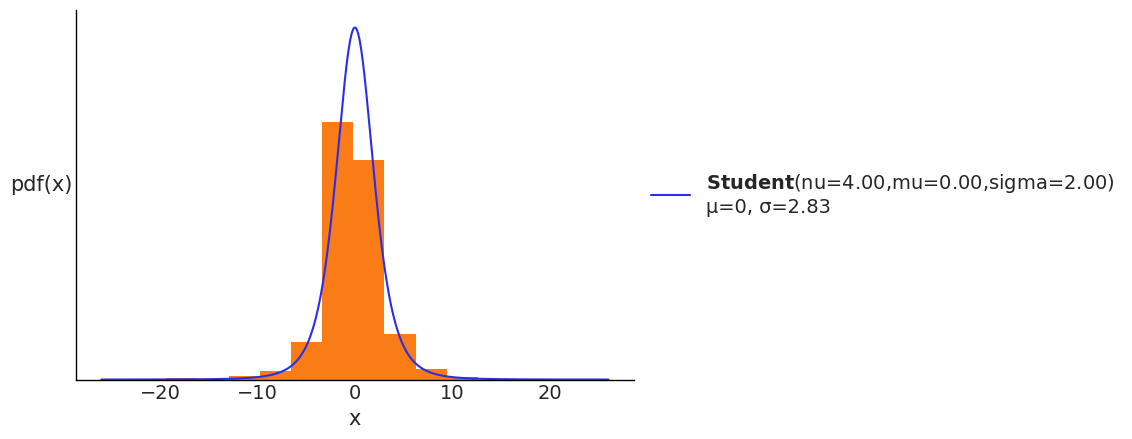

In [14]:
dist = pz.Student(nu=4, mu=0, sigma=2)  
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);

#### Distribución exponencial

La distribución [exponencial](https://en.wikipedia.org/wiki/Exponential_distribution) se define solo para $x > 0$. Esta distribución se suele usar para describir el tiempo que transcurre entre dos eventos que ocurren de forma continua e independiente a una taza fija. El número de tales eventos para un tiempo fijo lo da la distribución de Poisson.

$$
p(x \mid \lambda) = \lambda e^{-\lambda x} \tag {0.10}
$$

La media y la desviación estándar de esta distribución están dadas por $\frac{1}{\lambda}$ 

Scipy usa una parametrización  diferente donde la escala es igual a $\frac{1}{\lambda}$

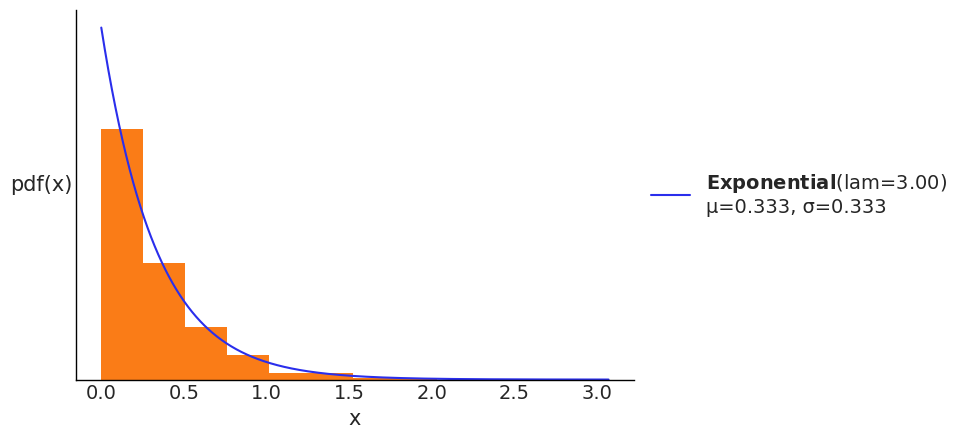

In [15]:
dist = pz.Exponential(3)  
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);

#### Distribución de Laplace

También llamada distribución [doble exponencial](https://en.wikipedia.org/wiki/Laplace_distribution), ya que puede pensarse como una distribución exponencial "más su imagen especular". Esta distribución surge de medir la diferencia entre dos variables exponenciales (idénticamente distribuidas). 

$$p(x \mid \mu, b) = \frac{1}{2b} \exp \left\{ - \frac{|x - \mu|}{b} \right\} \tag {0.11}$$


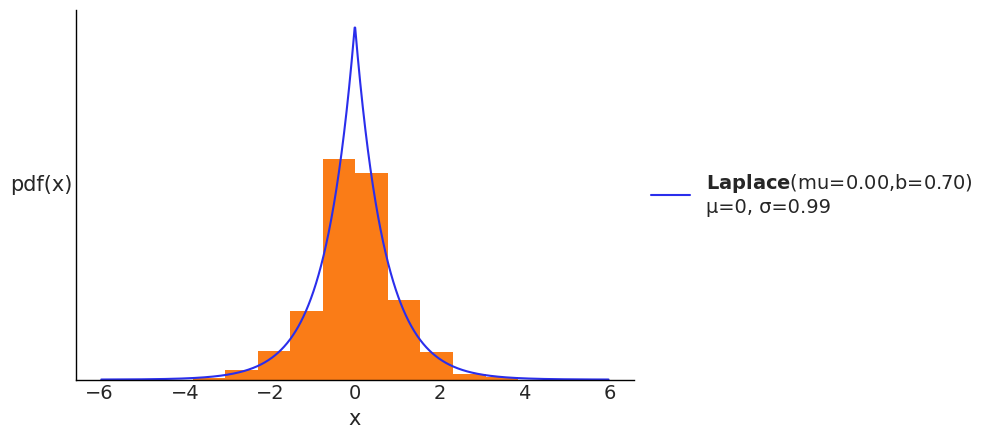

In [16]:
dist = pz.Laplace(0, 0.7)  
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);

#### Distribución beta

Es una [distribución](https://en.wikipedia.org/wiki/Beta_distribution) definida en el intervalo [0, 1]. Se usa para modelar el comportamiento de variables aleatorias limitadas a un intervalo finito. Es útil para modelar proporciones o porcentajes. 

$$
p(x \mid \alpha, \beta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1} \tag {0.12}
$$

El primer término es simplemente una constante de normalización que asegura que la integral de la $pdf$ de 1. $\Gamma$ es la función [gamma](https://en.wikipedia.org/wiki/Gamma_function). Cuando $\alpha=1$ y $\beta=1$ la distribución beta se reduce a la distribución uniforme.

Si queremos expresar la distribución beta en función de la media y la dispersión alrededor de la media podemos hacerlo de la siguiente forma.

$$\alpha = \mu \kappa$$
$$\beta = (1 − \mu) \kappa$$

Siendo $\mu$ la media y $\kappa$ una parámetro llamado concentración a media que $\kappa$ aumenta la dispersión disminuye. Nótese, además que $\kappa = \alpha + \beta$.

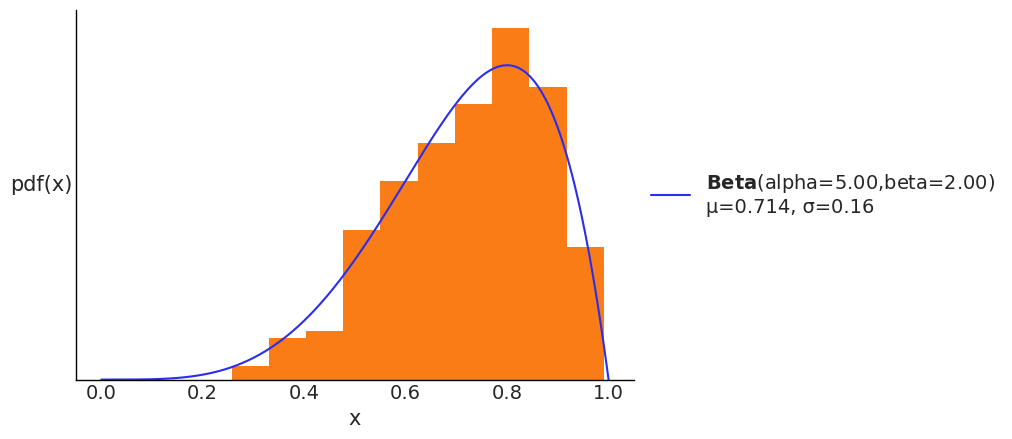

In [17]:
dist = pz.Beta(5, 2)  
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);

#### Distribución Gamma

Scipy parametriza a la distribución [gamma](https://en.wikipedia.org/wiki/Gamma_distribution) usando un parámetro $\alpha$ y uno $\theta$, usando estos parámetros la $pdf$ es:

$$
p(x \mid \alpha, \theta) = \frac{1}{\Gamma(\alpha) \theta^\alpha} x^{\alpha \,-\, 1} e^{-\frac{x}{\theta}} \tag {0.13}
$$

Una parametrización más común en estadística Bayesiana usa los parámetros $\alpha$ y  $\beta$, siendo $\beta = \frac{1}{\theta}$. En este caso la pdf queda como:

$$
p(x \mid \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} \tag {0.14}
$$


La distribución gamma se reduce a la exponencial cuando $\alpha=1$.

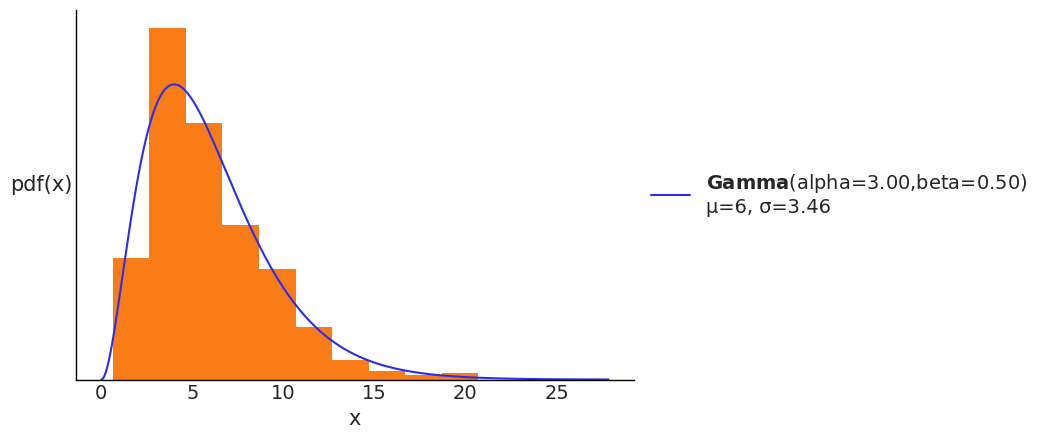

In [18]:
dist = pz.Gamma(alpha=3, beta=0.5)
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);

### Relación entre probabilidad conjunta, condicional y marginal

Al definir probabilidad condicional usamos la _expresión 0.5_. Ahora que ya estamos familiarizados con las distribuciones de probabilidad podemos representar gráficamente los tres términos en la *expresión 0.5*, tal como se muestra en la siguiente figura.

<img src="img/probabilidades.png" width=500>

* Probabilidad conjunta $p(A, B)$
* Probabilidad marginal $p(A)$ o $p(B)$ 
* Probabilidad condicional $p(A \mid B)$

Podemos re-escribir la _expresión 0.5_ de la siguiente manera:

$$
p(A, B) = p(A \mid B) {p(B)}  \tag {0.15}
$$

Es decir si tomo una probabilidad condicional y la _evalúo_ para todos los valores de la cantidad _condicionante_ ($B$ en este caso), obtengo la distribución conjunta. Esto se puede ver graficamente si pensamos que $p(A \mid B)$ es una _rebanada_ de p(A, B); rebanada que tomamos _a la altura_ de $B$. Si tomamos todas las rebanadas entonces obtendremos $p(A, B)$.

Para obtener las probabilidades marginales, que se encuentran en los _margenes_ 😉, podemos calcular algo similar:

$$
p(A) = \sum_B p(A, B) = \sum_B p(A \mid B) {p(B)} \tag {0.16}
$$ 

Cambiando la sumatoria por una integral para distribuciones continuas.

### Distribución acumulada

La `pdf` (o la `pmf`) son formas comunes de representar y trabajar con variables aleatorias, pero no son las únicas formas posibles. Existen otras representaciones equivalentes. Por ejemplo la función de distribución acumulada (`cdf` en inglés). Al integrar una `pdf` se obtiene la correspondiente `cdf`, y al derivar la `cdf` se obtiene la `pdf`.


La integral de la `pdf` es llamada función de distribución acumulada (`cdf`):

$$
cdf(x) = \int_{-\infty}^{x} pdf(x) d(x) \tag {0.17}
$$

En algunas situaciones se prefiere hablar de la función de supervivencia:

$$
S(x) = 1 - cdf  \tag {0.18}
$$


A continuación un ejemplo de la `pdf` y `cdf` para 4 distribuciones de la familia Gaussiana.

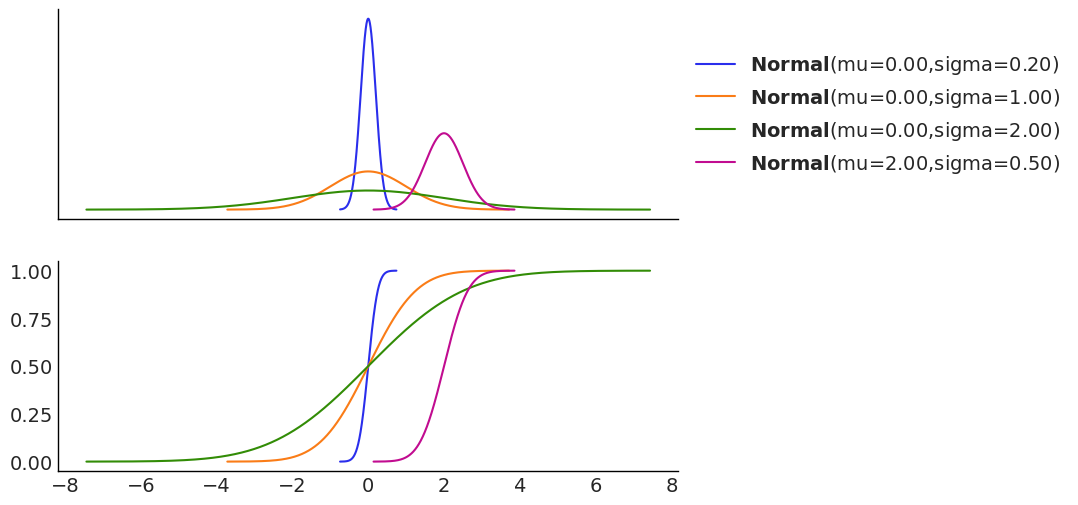

In [19]:
_, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
x_valores = np.linspace(-4, 4, 500)
valores = [(0., .2), (0., 1.), (0., 2.), (2., .5)]
for val in valores:
    pz.Normal(*val).plot_pdf(ax=ax[0])
    pz.Normal(*val).plot_cdf(ax=ax[1])
    ax[1].get_legend().remove()


La siguiente figura tomada del libro [Think Stats](http://greenteapress.com/thinkstats2/html/index.html) resume las relaciones entre la `cdf`, `pdf` y `pmf`.

<img src='img/cmf_pdf_pmf.png' width=600 >

## Comparando dos distribuciones

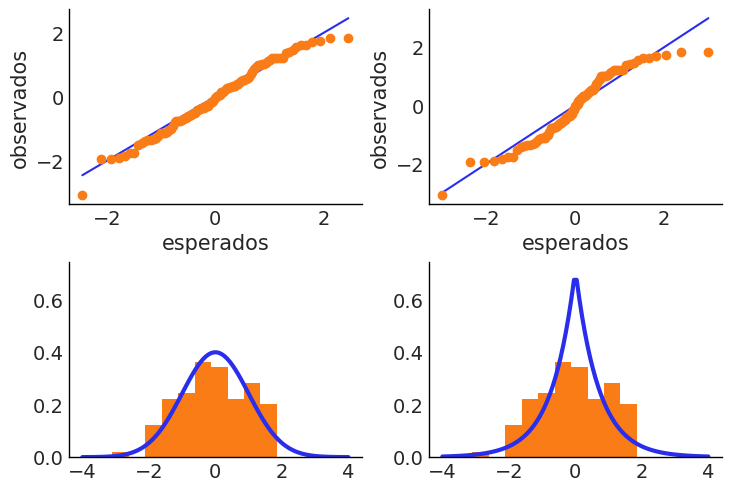

In [20]:
muestra = np.random.normal(0, 1, 100)
dist = stats.norm(0, 1), stats.laplace(scale=0.7)
x = np.linspace(-4, 4, 100)
dist_pdf = dist[0].pdf(x), dist[1].pdf(x)


_, ax = plt.subplots(2, 2, constrained_layout=True)
for i in range(2):
    osm, osr = stats.probplot(muestra, fit=False, dist=dist[i])
    ax[0,i].plot(osm, osm)
    ax[0,i].plot(osm, osr, 'o')
    ax[0,i].set_xlabel('esperados')
    ax[0,i].set_ylabel('observados')
    ax[1, i].plot(x, dist_pdf[i], lw=3)
    ax[1, i].hist(muestra, density=True)
    ax[1, i].set_ylim(0, np.max(dist_pdf) * 1.1)

## Límites 

Los dos teoremas más conocidos y usados en probabilidad son la ley de los grandes números y el teorema del límite central. Ambos nos dicen que le sucede a la media muestral a medida que el tamaño de la muestra aumenta.

### La ley de los grandes números

El valor promedio calculado para una muestra converge al valor esperado (media) de dicha distribución. Esto no es cierto para algunas distribuciones como la distribución de Cauchy (la cual no tiene media ni varianza finita).

La ley de los grandes números se suele malinterpretar y dar lugar a la paradoja del apostador. Un ejemplo de esta paradoja es creer que conviene apostar en la lotería/quiniela a un número _atrasado_, es decir un número que hace tiempo que no sale. El razonamiento, erróneo, es que como todos los números tienen la misma probabilidad a largo plazo si un número viene _atrasado_ entonces hay alguna especie de fuerza que aumenta la probabilidad de ese número en los próximo sorteos para así re-establecer la equiprobabilidad de los números.

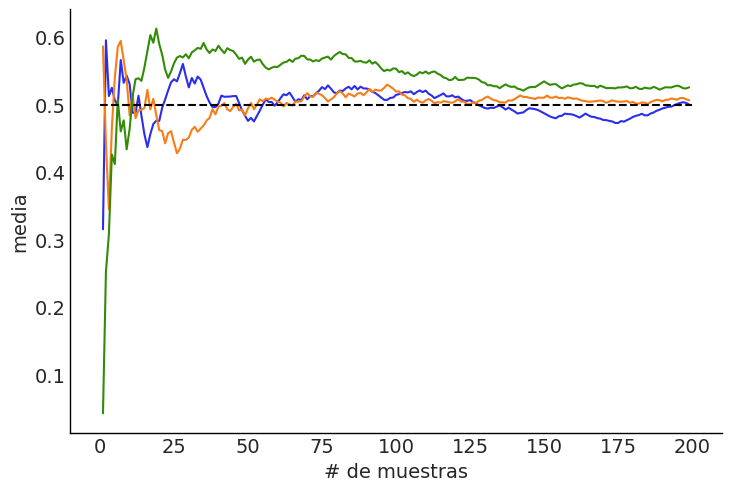

In [21]:
tamaño_muestra = 200
muestras = range(1, tamaño_muestra)
dist = stats.uniform(0, 1)
media_verdadera = dist.stats(moments='m')

for _ in range(3):
    muestra = dist.rvs(tamaño_muestra)
    media_estimada = [muestra[:i].mean() for i in muestras]
    plt.plot(muestras, media_estimada, lw=1.5)

plt.hlines(media_verdadera, 0, tamaño_muestra, linestyle='--', color='k')
plt.ylabel("media", fontsize=14)
plt.xlabel("# de muestras", fontsize=14);

### El teorema central del límite

El teorema central del límite (también llamado teorema del límite central) establece que si tomamos $n$ valores (de forma independiente) de una distribución arbitraria la media $\bar X$ de esos valores se _distribuirá aproximadamente como_ una Gaussiana a medida que ${n \rightarrow \infty}$:

$$
\bar X_n \dot\sim \mathcal{N} \left(\mu,  \frac{\sigma^2}{n}\right) \tag {0.19}
$$

Donde $\mu$ y $\sigma^2$ son la media y varianza poblacionales.

Para que el teorema del límite central se cumpla se deben cumplir los siguientes supuestos:

1. Las variables se muestrean de forma independiente
1. Las variables provienen de la misma distribución
1. La media y la desviación estándar de la distribución tiene que ser finitas

Los criterios 1 y 2 se pueden relajar _bastante_ y aún así obtendremos aproximadamente una Gaussiana, pero del criterio 3 no hay forma de escapar. Para distribuciones como la distribución de Cauchy, que no posen media ni varianza definida este teorema no se aplica. El promedio de $N$ valores provenientes de una distribución Cauchy no siguen una Gaussiana sino una distribución de Cauchy.

El teorema del límite central explica la prevalencia de la distribución Gaussiana en la naturaleza. Muchos de los fenómenos que estudiamos se pueden explicar como fluctuaciones alrededor de una media, o ser el resultado de la suma de muchos factores diferentes. Además, las Gaussianas son muy comunes en probabilidad, estadística y _machine learning_ ya que que esta familia de distribuciones son más simples de manipular matemáticamente que muchas otras distribuciones.

A continuación vemos una simulación que nos muestra el teorema del límite central en acción.

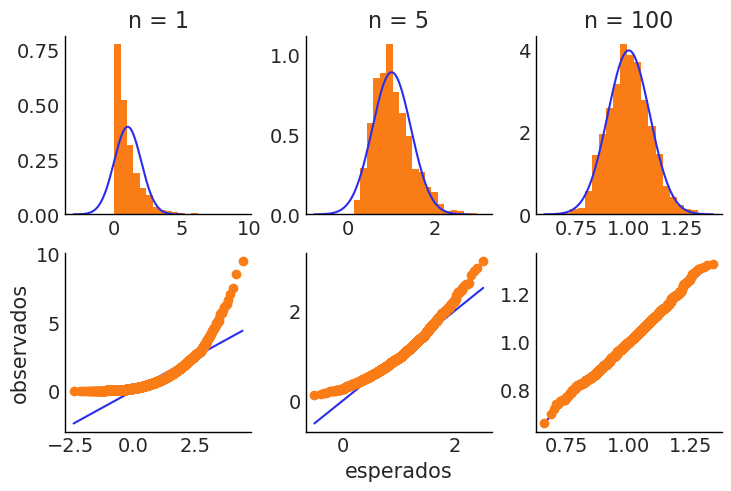

In [22]:
iters = 2000
distri = stats.expon(scale=1)
media, var = distri.stats(moments='mv')

_, ax = plt.subplots(2, 3)

for i, n in enumerate([1, 5, 100]):
    sample = np.mean(distri.rvs((n, iters)), axis=0)

    sd = (var/n)**0.5 
    x = np.linspace(media - 4 * sd, media + 4 * sd, 200)
    ax[0, i].plot(x, stats.norm(media, sd).pdf(x))
    ax[0, i].hist(sample, density=True, bins=20)
    ax[0, i].set_title('n = {}'.format(n))
    osm, osr = stats.probplot(sample, dist=stats.norm(media, sd), fit=False)
    ax[1, i].plot(osm, osm)
    ax[1, i].plot(osm, osr, 'o')
ax[1, 0].set_ylabel('observados')
ax[1, 1].set_xlabel('esperados');

## Ejercicios

1. De las siguientes expresiones cual(es) se corresponde(n) con el enunciado "la probabilidad de lluvia dado que es 25 de Mayo de 1810"?
    * p(lluvia)
    * p(lluvia | mayo)
    * p(25 de Mayo de 1810 | lluvia)
    * p(lluvia | 25 de Mayo de 1810 )
    * p(lluvia, 25 de Mayo de 1810) / p(25 de Mayo de 1810)
    
2. Enuncie con palabras cada una de las expresiones del punto anterior. 

1. Según la definición de probabilidad condicional
    * Cual es el valor de $P(A \mid A)$?
    * Cual es la probabilidad de $P(A, B)$?
    * Cual es la probabilidad de $P(A, B)$ en el caso especial que $A$ y $B$ sean independientes? 
    * Cuando se cumple que $P(A \mid B) = P(A)$?
    * Es posible que $P(A \mid B) > P(A)$, cuando?
    * Es posible que $P(A \mid B) < P(A)$, cuando?

 Los siguientes ejercicios se deben realizar usando Python (y NumPy, SciPy, Matplotlib)
1. Ilustrar que la distribución de Poisson se aproxima a una binomial cuando para la binomial $n >> p$.

1. Para alguna de las distribuciones discretas presentadas en esta notebook verificar que la probabilidad total es 1.

1. Para alguna de las distribuciones continuas presentadas en esta notebook verificar que el área bajo la curva es 1.

1. Obtener la cdf a partir de la pdf (usar el método pdf provisto por SciPy). La función `np.cumsum` puede ser de utilidad.

1. Obtener la pdf a partir de la cdf (usar el método cdf provisto por SciPy). La función `np.diff` puede ser de utilidad.

1. Repetir la simulación para la ley de los grandes números para al menos 3 distribuciones de probabilidad. Para cada distribución probar más de un conjunto de parámetros.

1. Repetir la simulación para el teorema central del límite para al menos 3 distribuciones de probabilidad. Para cada distribución probar más de un conjunto de parámetros.

1. Mostrar en un gráfico que la media $\bar X$ converge a $\mu$ y la varianza converge a $\frac{\sigma^2}{n}$ a medida que aumenta el tamaño de la muestra.